### 2.3.3 线性模型

线性模型利用输入特征的**线性函数**进行预测

##### 1. 用于回归的线性模型

$ \hat{y} = w[0] * x[0] + w[1] * x[1]\quad+ ... +\quad w[p] * x[p] + b $

这里$w[i]$ 和 $b$ 是学习模型的参数， $x[0]...x[p]$是单个数据点的特征， $\hat{y}$是模型的预测结果。对于单一特征的数据集，公式如下

$\hat{y} = w * x + b$

这其实类似高中数学的直线方程，其中$w$就是斜率，$b$是直线在y轴的偏移量

w[0]: 0.393906  b: -0.031804


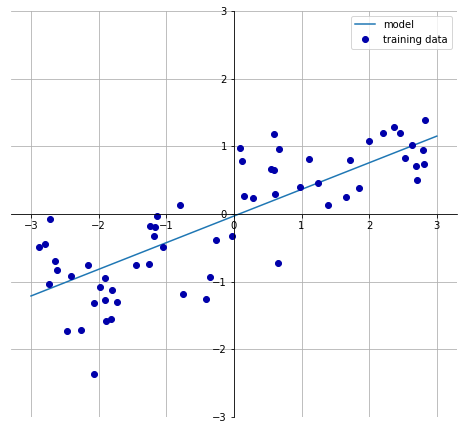

In [3]:
import mglearn

mglearn.plots.plot_linear_regression_wave()

上图是训练数据在对wave数据集在线性回归模型上的测试图，测试的目的是使数据在模型上预测出的结果与标准的答案的均方误差最小

用于回归的线性模型可以表示为：对单一特征的预测结果是一条直线，对两个特征时是一个平面，或者在更高维度（特征）时是一个超平面。

##### 2. 线性回归（普通最小二乘法）

线性回归又叫**普通最小二乘法**，是回归问题最简单也是最经典的线性方法，线性回归寻找参数$x$和$b$，使得对训练集的预测值与真实的回归目标值$y$之间的**均方误差**最小。均方误差是预测值与真实值之差的平方和除以样本数

线性回归没有参数（LinearRegression()初始化类时），这是一个优点，但也没办法控制模型的复杂度

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


sklearn总是将从训练数据中得出的值保存在以下划线结尾的属性中，例如上述代码中的coef_和intercept_，线性回归的模型都有这两个参数

intercept_属性是一个浮点数，而coef_属性是一个Numpy数组，每一个元素对应一个输入特征。这里coef_只有一个元素是因为wave只有一个输入特征

In [3]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


$R^2$的结果约为0.66，结果并不是很好，并且我们看到训练集和测试集的$R^2$分数非常接近，所以可能存在的是欠拟合，而不是过拟合。因为对这个一维数据集来说，过拟合的风险非常小，因为模型非常简单

现在我们对波士顿房价数据集进行预测，该数据集有506个样本和105个导出特征。（线性模型对于有大量特征的数据集有更加强大的表现）

In [4]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


通过比较可以发现，在测试集上的数据分数很高，但在训练集上就不行了，这是明显的过拟合的标志。我们必须要找到一个可以控制复杂度的模型，标准线性回归最常用的替代方法之一就是**岭回归**

##### 岭回归

岭回归也是用于回归的线性模型，因此其预测公式与最小二乘法相同。但岭回归唯一的不同就是：其会对$w$参数附加约束，其意味着每个特征对输出的影响是可控的。（最小二乘法之所以会有过拟合现象是因为没有对$w$附加约束，使得模型训练精度过高，测试精度低，拟合度小（**测试数据量多时可能将不会有这种情况**））

对模型的这种约束是所谓的正则化。**正则化**是指对模型做显示约束，以避免过拟合，岭回归用到的便是L2正则化。

岭回归在sklearn.linear_model.Ridge中实现，下面是其对波士顿房价数据集的测试

In [5]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


可以看出，Ridge在训练集上的分数要低于LinearRegression，但在测试集上的分数更高。线性回归对数据存在过拟合现象，但很明显Ridge是一种约束性更强的模型，所以更不容易过拟合。复杂度小的模型意味着在训练集上的性能更差，但泛化性能更好。

Ridge模型在模型的简单性与训练集性能之间做出权衡。简单性和训练集性能二者对模型的重要程度可以通过用户设置的alpha参数指定。增大alpha参数会加剧约束程度，即$w$会更趋近于零。反之则减少约束程度，当Ridge模型中的alpha参数过小时，其性能与LinearRegression差不多

In [6]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [7]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


下面查看当alpha参数取不同值时特征值的$w$参数：

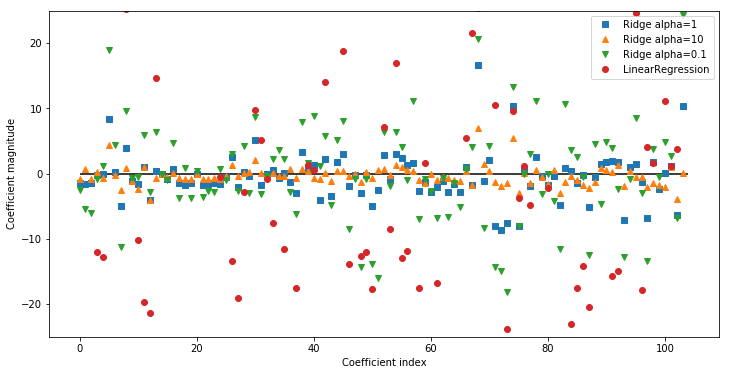

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

这里x轴对应coef_的元素，共有105个（大概是）,也就是特征值的个数。图例为：x=0时对应第一个特征的系数，x=1对应第二个特征的系数，以此类推，y轴即代表该特征的预测值，即$w$，也就是斜率。这个图可以明显的看出alpha参数对模型的印象

还有一种方法可以理解正则化的影响，那就是固定alpha值，但改变训练数据量。接下来对波士顿房价数据集做二次采样，并在数据量逐渐增加的子数据集上分别对LinearRegression和Ridge两个模型进行评估。下面是岭回归和线性回归在波士顿房价数据集上的**学习曲线**

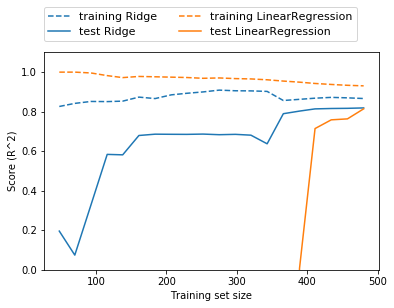

In [9]:
import mglearn

mglearn.plots.plot_ridge_n_samples()

如上图所示，无论是Ridge（岭回归）还是LinearRegression（线性回归），所有数据集的训练分数都要高于预测分数。由于岭回归是正则化的，所以岭回归的训练分数都小于线性回归的训练分数。但是岭回归的测试分数普遍高。

当数据集的数据点较少时，如上图，小于400个数据点时，线性回归并不能学到任何东西。当数据量越来越多时，两个模型的性能都在提升，并且最后线性回归的性能追上了岭回归。当数据量足够多时，其实正则化就不那么重要了，并且两个模型的性能将近乎相同。（上图测试性能相同时刚好发生在数据完时，这里是个巧合）。

图中当数据量增多时，可以发现线性回归的训练性能（精度/正确率）正在下降。如果数据继续增多，模型将更加难以过拟合或记住所有数据。

##### lasso

处理Ridge，还有一种正则化的线性回归模型是Lasso。与岭回归相同，也是约束$w$系数使其接近于0，但lasso是L1正则化。L1正则化的结果是，使用lasso时会让某些系数刚好为0，也就是有些特征会被模型完全忽略。这可以看做是一种自动化的特征选择。

接下来将lasso应用在扩展的波士顿房价数据集上：

In [11]:
import numpy as np
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


这里可以看到，模型只使用105个特征中的4个，并且测试和训练的性能都非常差，说明存在欠拟合。

Lasso模型也有跟Ridge一样设置约束程度的系数alpha，为了降低欠拟合程度，我们将减少alpha,同时还需要增加max_iter的值（运行迭代的最大次数）

In [13]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_!=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [15]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_!=0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


Text(0,0.5,'Coefficient magnitude')

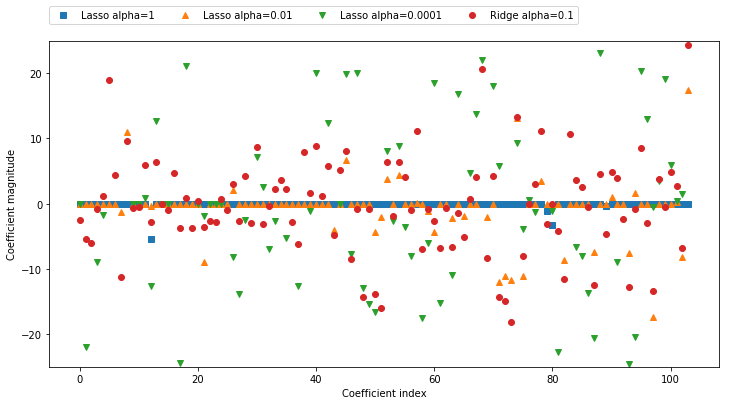

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=4, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")